In [ ]:
import numpy as np
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras import optimizers
from keras import regularizers
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix

## Data Preprocessing

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32') /255
x_test = x_test.astype('float32') /255
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)
# Mean normalization
mean = np.mean(x_train, axis=0)
x_train -= mean
x_test -= mean

In [ ]:
print(x_train.shape[-3:],y_train.shape)

(32, 32, 3) (50000, 100)


## Building the Model

In [ ]:
def create_model():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same',
                      input_shape=x_train.shape[-3:],kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512,kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)       

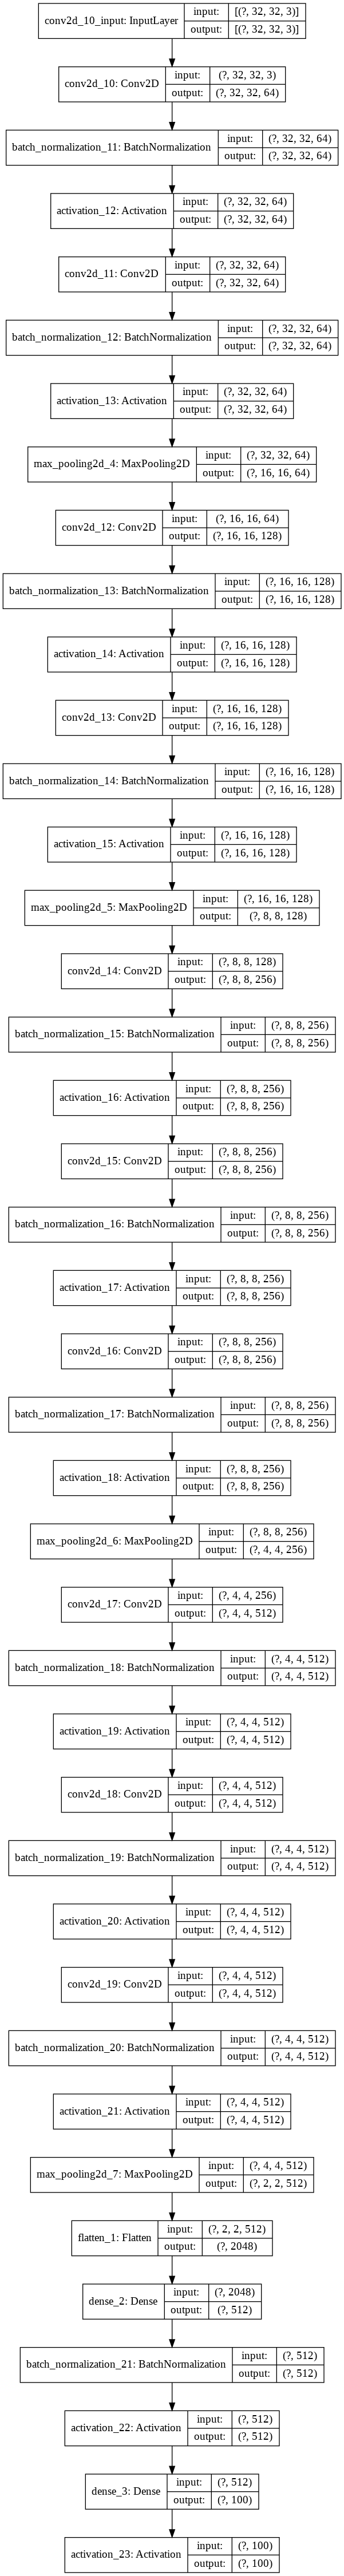

In [ ]:
model = create_model()
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Learning rate 0.035 gave best results with decay 1e-5, accuracy dropped when lr/decay was increased
sgd = optimizers.SGD(lr=0.035, decay=1e-5,momentum=0.8) #epochs=150
adam = optimizers.Adam(lr=0.001, decay = 1e-3) #epochs=80
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',min_delta=0.0001,patience=3,mode='max')
checkpoint_path = "VGGNet16_ADAM_BatchNormalization"
best_model = ModelCheckpoint(filepath = checkpoint_path, save_best_only=True,save_weights_only=True, monitor='val_accuracy', mode='max')
# batch size to 128 for best accuracy, it decreases if batch size is increased
history = model.fit(x_train, y_train,
                    batch_size= 128,
                    epochs=100,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping,best_model],verbose=2)

Epoch 1/100
391/391 - 21s - loss: 5.5753 - accuracy: 0.1762 - val_loss: 5.9105 - val_accuracy: 0.0712
Epoch 2/100
391/391 - 21s - loss: 3.5662 - accuracy: 0.3336 - val_loss: 3.5522 - val_accuracy: 0.3066
Epoch 3/100
391/391 - 21s - loss: 2.8974 - accuracy: 0.4351 - val_loss: 3.3549 - val_accuracy: 0.3393
Epoch 4/100
391/391 - 21s - loss: 2.5323 - accuracy: 0.5068 - val_loss: 3.2625 - val_accuracy: 0.3610
Epoch 5/100
391/391 - 21s - loss: 2.2615 - accuracy: 0.5662 - val_loss: 2.7720 - val_accuracy: 0.4504
Epoch 6/100
391/391 - 21s - loss: 2.0288 - accuracy: 0.6226 - val_loss: 2.7596 - val_accuracy: 0.4620
Epoch 7/100
391/391 - 21s - loss: 1.8142 - accuracy: 0.6735 - val_loss: 2.4900 - val_accuracy: 0.5144
Epoch 8/100
391/391 - 20s - loss: 1.6044 - accuracy: 0.7338 - val_loss: 2.5237 - val_accuracy: 0.5129
Epoch 9/100
391/391 - 20s - loss: 1.3964 - accuracy: 0.7896 - val_loss: 2.6378 - val_accuracy: 0.5123
Epoch 10/100
391/391 - 21s - loss: 1.1953 - accuracy: 0.8472 - val_loss: 2.4302 - 

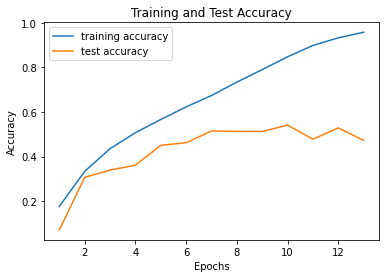

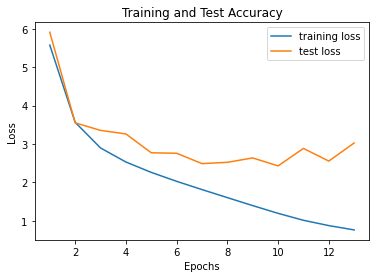

In [ ]:
#plot Accuracy vs epochs
train_metrics = history.history['accuracy']
val_metrics = history.history['val_accuracy']
epochs = range(1, len(train_metrics) + 1)
plt.plot(epochs, train_metrics)
plt.plot(epochs, val_metrics)
plt.title('Training and Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training accuracy", 'test accuracy'])
plt.show()
#plot Validaiton loss vs epochs
train_metrics = history.history['loss']
val_metrics = history.history['val_loss']
plt.plot(epochs, train_metrics)
plt.plot(epochs, val_metrics)
plt.title('Training and Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["training loss", 'test loss'])
plt.show()

In [ ]:
model = create_model()
# checkpoint_path = "../weights/VGGNet16_ADAM_BatchNormalization"
checkpoint_path = "VGGNet16_ADAM_BatchNormalization"
model.load_weights(checkpoint_path)
# loss,acc = model.evaluate(x_test,  y_test, verbose=2)
# print('Test Accuracy:', acc)
prediction = model.predict(x_test).argmax(-1)
cm = confusion_matrix(y_test.argmax(axis=1), prediction)
np.set_printoptions(threshold=5000)
print(cm)
precision = precision_score(y_test.argmax(axis=1), prediction, average='weighted')

accuracy= accuracy_score(y_test.argmax(axis=1), prediction)
recall= recall_score(y_test.argmax(axis=1), prediction, average='weighted')

print('precision:', precision)
print('accuracy:', accuracy)
print('recall:', recall)

[[68  0  1 ...  0  0  1]
 [ 0 74  1 ...  0  0  1]
 [ 0  1 47 ...  0  7  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  4 ...  0 27  0]
 [ 0  0  0 ...  0  0 64]]
precision: 0.5855214517421303
accuracy: 0.5409
recall: 0.5409
